In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import math

mpl.rcParams['text.color'] = 'red'
mpl.rcParams['xtick.color'] = 'r'
mpl.rcParams['ytick.color'] = 'r'
mpl.rcParams['axes.labelcolor'] = 'red'


---
# Projections in R^2
---

beta : 0.4482758620689655


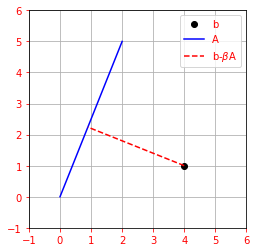

In [2]:
# point b
b = np.array([4,1])

# line a
a = np.array([ 2, 5 ])

# beta
# beta = (a.T @ b)/ (np.linalg.norm(a) * np.linalg.norm(a))
beta = (a.T @ b)/ (a @ a.T)
print('beta :', beta)

# draw
plt.plot(b[0], b[1], 'ko', label='b')
plt.plot([0, a[0]], [0, a[1]],'b', label='A')
plt.plot([b[0], beta*a[0]], [b[1], beta*a[1]],'r--', label=r'b-$\beta$A')
plt.grid()
plt.axis('square')
plt.legend()
plt.axis((-1, 6, -1, 6))
plt.show()


---
# projections in R^N
---


In [3]:
## the goal here is to solve Ax=b for x

# sizes
m = 16
n = 10

# vector b
b = np.random.randn(m, 1)

# matrix A
A = np.random.randn(m, n)

# solution using explicit inverse
x1 = np.linalg.inv(A.T @ A) @ (A.T @ b)

# python solution (better method)
x2 = np.linalg.solve(A.T @ A, A.T @ b)

# show that the results are the same
print(np.round(x1.T, 3))
print(np.round(x2.T, 3))

[[ 0.298  1.154  0.626  0.808 -1.002  0.251  0.36  -0.443 -0.217 -0.115]]
[[ 0.298  1.154  0.626  0.808 -1.002  0.251  0.36  -0.443 -0.217 -0.115]]


In [4]:
## geometric perspective in R^3

# matrix sizes
m = 3
n = 2

# vector b
b = np.random.randn(m, 1)

# matrix A
A = np.random.randn(m, n)

x = np.linalg.solve(A.T @ A, A.T @ b)
# A @ beta
Ax = A @ x
print(b.T)
print(Ax.T)

[[-0.86136841  0.54887376  0.60501549]]
[[-0.24562461 -0.28776909  0.34714868]]


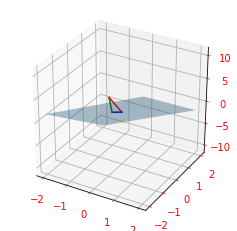

In [8]:
## plot
fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.gca(projection='3d')

# plot the vectors
ax.plot([0, b[0]],[0, b[1]],[0, b[2]],'r')
ax.plot([0, Ax[0]],[0, Ax[1]],[0, Ax[2]],'b')

# plot the projection line
ax.plot( [Ax[0][0], b[0]],
         [Ax[1][0], b[1]],
         [Ax[2][0], b[2]], 'g')

# now draw plane
xx, yy = np.meshgrid(np.linspace(-2,2), np.linspace(-2,2))
cp = np.cross(A[:,0],A[:,1])
z1 = (-cp[0]*xx - cp[1]*yy)*1./cp[2]
ax.plot_surface(xx,yy,z1,alpha=.4)

plt.show()

---
### Code challange: decompose vector to orthogonal components
---

dot product 0.0
[0. 0.]


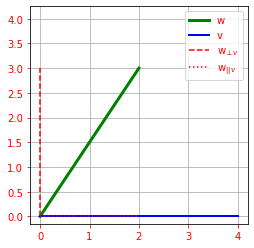

In [65]:
# vector w, to be decomposed
w = np.array([2 ,3])

# vector v, refrence vector
v = np.array([4, 0])

# compute beta
beta = (v.T @ w)/(v.T @ v)

# compute w parallel to v
w_parallel_v = beta * v

# compute w orthogonal to v
w_orthogonal_v = w - w_parallel_v

# confirm results algebrically ( sum to w, orthogonal components)
print('dot product', w_parallel_v.T @ w_orthogonal_v)
print(w_parallel_v + w_orthogonal_v - w)
# plot all the four vectors
plt.plot([0, w[0]], [0, w[1]], 'g', label='w', linewidth=3)
plt.plot([0, v[0]], [0, v[1]], 'b', label='v', linewidth=2)
plt.plot([0, w_orthogonal_v[0]], [0, w_orthogonal_v[1]], 'r--', label='w$_{\perp v}$')
plt.plot([0, w_parallel_v[0]], [0, w_parallel_v[1]], 'r:', label='w$_{|| v}$')
plt.grid()
plt.axis('square')
plt.legend()
plt.show()


---
# QR decomposition
---


In [68]:
# example from the slides

A = [ [1,0],
      [1,0],
      [0,1] ]
# "economy" QR decomposition
Q, R = np.linalg.qr(A, 'complete')
print(Q), print(' ')

# "economy" QR decomposition
Q, R = np.linalg.qr(A)
print(Q)

[[-0.70710678  0.          0.70710678]
 [-0.70710678  0.         -0.70710678]
 [-0.         -1.          0.        ]]
 
[[-0.70710678  0.        ]
 [-0.70710678  0.        ]
 [-0.         -1.        ]]


In [111]:
# the to-be-decomposed matrix
M = np.array( [ [1, 1,-2], 
               [3,-1, 1] ] )

Q, R = np.linalg.qr(M, 'complete')
print('R from QR: ')
print(np.round(R, 4))
print(' ')
print('R from Q^TM: ')
print(np.round(Q.T @ M, 4))

R from QR: 
[[-3.1623  0.6325 -0.3162]
 [ 0.     -1.2649  2.2136]]
 
R from Q^TM: 
[[-3.1623  0.6325 -0.3162]
 [ 0.     -1.2649  2.2136]]


[]

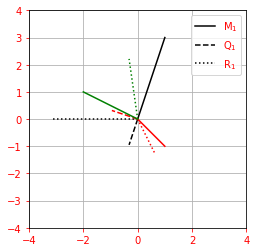

In [73]:
# plot
colorz = 'krg'

for i in range(0,np.shape(M)[1]):
    
    # plot original vector M
    plt.plot([0,M[0,i]],[0,M[1,i]],colorz[i])
    
    # plot orthogonalized vector Q
    if i<np.shape(Q)[1]:
        plt.plot([0,Q[0,i]],[0,Q[1,i]],colorz[i],linestyle='--')
    
    # plot residual vector R
    plt.plot([0,R[0,i]],[0,R[1,i]],colorz[i],linestyle=':')

    
plt.legend(['M$_1$','Q$_1$','R$_1$'])
plt.axis('square')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.grid(True)
plt.plot()

---
### Code challenge: Gram-Schmidt algorithm
---

In [126]:
def projection(dec_vec, ref_vec):
    beta = np.dot(ref_vec, dec_vec)/np.dot(ref_vec, ref_vec)
    dec_parallel_ref = beta * ref_vec
    dec_perpendicular_ref = dec_vec - dec_parallel_ref
    return dec_parallel_ref, dec_perpendicular_ref

In [131]:
def qr(mat):
    Q = np.zeros((mat.shape))
    Q[:,0] =  mat[:, 0] / np.linalg.norm(mat[:, 0])
    for i in range(1, mat.shape[1]):
        Q[:, i] = mat[:, i]
        j = i-1
        while j >= 0:
            par, per = projection(mat[:,i], Q[:,j])
            Q[:, i] = Q[:, i] - par
            j -= 1
        Q[:, i] = Q[:, i]/np.linalg.norm(Q[:, i])
    R = np.round(Q.T @ mat, 6)
    return Q, R

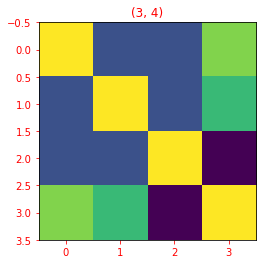

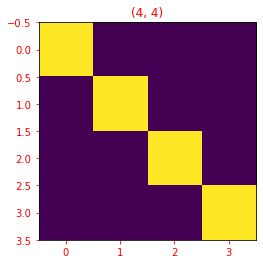

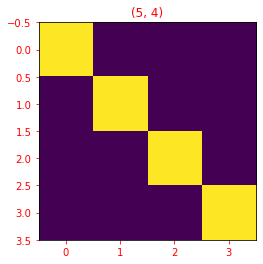

In [159]:
for i in [3, 4, 5]:
    m = i
    n = 4
    M = np.random.randn(m, n)
    Q, R = qr(M)

    plt.imshow(Q.T @ Q)
    plt.title(f'{m ,n}')
    plt.show()

In [160]:
Q2, R2 = np.linalg.qr(M, 'complete')
print(Q2)
print('-'*40)
print(R2)

[[-0.60099464  0.04111807  0.77163761  0.1062362  -0.17436749]
 [-0.06086416 -0.1199412  -0.05596482  0.87289228  0.46565725]
 [-0.15022862  0.76392549 -0.30286287  0.31526995 -0.45025343]
 [-0.29987981  0.49852387 -0.04645669 -0.34702543  0.73413975]
 [ 0.72291386  0.38963472  0.5545802   0.08337355  0.10521399]]
----------------------------------------
[[ 1.83317955 -0.36604838  0.42851293 -0.60442419]
 [ 0.          1.56752611 -0.83052236 -0.94532202]
 [ 0.          0.         -1.88713209 -0.87192865]
 [ 0.          0.          0.          0.58216654]
 [ 0.          0.          0.          0.        ]]


In [161]:
print(Q) # 3, 2 X 2, 3
print('-'*40)
print(R)
print('-'*40)
print(np.round(Q.T @ Q), 5)
# here we can see that linalg.qr added one more col because it is possible to add one more
# col which is orthogonal to all cols

[[-0.60099464  0.04111807 -0.77163761  0.1062362 ]
 [-0.06086416 -0.1199412   0.05596482  0.87289228]
 [-0.15022862  0.76392549  0.30286287  0.31526995]
 [-0.29987981  0.49852387  0.04645669 -0.34702543]
 [ 0.72291386  0.38963472 -0.5545802   0.08337355]]
----------------------------------------
[[ 1.83318  -0.366048  0.428513 -0.604424]
 [ 0.        1.567526 -0.830522 -0.945322]
 [ 0.       -0.        1.887132  0.871929]
 [ 0.        0.       -0.        0.582167]]
----------------------------------------
[[ 1.  0. -0.  0.]
 [ 0.  1. -0.  0.]
 [-0. -0.  1. -0.]
 [ 0.  0. -0.  1.]] 5
